<a href="https://colab.research.google.com/github/joberiai/Dataset_OnePiece/blob/main/clasificaci%C3%B3n_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTREGABLE 3: CLASIFICACIÓN DE TEXTO**




## **CARGAR LIBRERÍAS**

In [1]:
!pip install fastai -Uqq
!pip install datasets -Uqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from fastai.text.all import *
from datasets import load_dataset

## **DATASET**

He elegido el de languages, y no me hizo falta eliminar ninguna columna

In [3]:
language_ident_dataset = load_dataset("papluca/language-identification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/70000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

## **CARGAR DATOS**

In [4]:
train_df = language_ident_dataset["train"].to_pandas()
valid_df = language_ident_dataset["validation"].to_pandas()
test_df = language_ident_dataset["test"].to_pandas()

In [5]:
train_df

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituânia, alemanha, itália, espanha e eslováquia assinarão o acordo para fornecer pessoal e financiamento para o centro."
1,bg,размерът на хоризонталната мрежа може да бъде по реда на няколко километра ( km ) за на симулация до около 100 km за на симулация .
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出就可以了，推荐给大家！！
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ของเก่า ที่ ไม่ 29 สำหรับ เฟอร์นิเจอร์ และ เงิน ไท ร้อง บริษัท ที่ 122 สำหรับ ลาย คราม
4,ru,Он увеличил давление .
...,...,...
69995,ja,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だったんだろうと思わすぐらい、音質もよくフィット感もあり、5時間ぐらいつけましたが全然疲れない仕様でした。もう大手メーカーの時代わ終わりましたね笑
69996,el,"Ναι , ξέρω ένα που είναι ακόμα έτσι , αλλά αυτό είναι ότι είμαι κάτω σε ένα φίλο που κρατάει αυτή τη θέση ακόμα είμαι η μόνη στο σπίτι αυτή τη στιγμή και έχω τα παιδιά να φωνάζουν για την προσοχή μου τώρα , οπότε καταλαβαίνω τι . Αυτό είναι σαν"
69997,ur,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گزشتہ سال کے دوران ، میں گزشتہ سال کے بارے میں نہیں جانتا تھا ۔
69998,es,"Se me rompió uno al sacarlo del cargador. Calidad nefasta para el precio que tiene, no lo recomiendo. Que pesaos con las palabras que faltan para la opinión por Dios."


In [6]:
train_df['set']=False
valid_df['set']=True

train_valid_df = pd.concat([train_df,valid_df])
train_valid_df = train_valid_df.rename(columns={"text_lang": "text"})

## **MODELO DE LENGUAJE**

In [7]:
db_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True,max_vocab=100000), # Indicamos que vamos a trabajar con un modelo de lenguaje
    get_items=ColReader('text'), # Indicamos donde estará el texto dentro del dataframe
    splitter=RandomSplitter(0.1) # Partimos el dataset en entrenamiento y validación
)

In [8]:
dls_lm = db_lm.dataloaders(train_valid_df, bs=128, seq_len=80)

In [9]:
dls_lm.show_batch(max_n=2)

,text,text_
0,"xxbos xxmaj tripod was xxunk while it worked but after a month the plastic on the phone holder started to break apart from xxup very light use . xxmaj so i have the tripod but i ca n't use it with my phone because the phone attachment broke where it connects to the tripod . xxmaj if i had used this daily for months xxmaj i 'd be okay with it , but xxmaj i 've used it no more","xxmaj tripod was xxunk while it worked but after a month the plastic on the phone holder started to break apart from xxup very light use . xxmaj so i have the tripod but i ca n't use it with my phone because the phone attachment broke where it connects to the tripod . xxmaj if i had used this daily for months xxmaj i 'd be okay with it , but xxmaj i 've used it no more than"
1,xxunk των xxunk που xxunk για να xxunk επιπλέον 2 . δολάρια . xxbos xxmaj the flash drive is good but at times the xxmaj sandisk xxmaj memory xxmaj zone app on xxmaj android devices is unable to detect the xxunk inserted . xxmaj works good on xxup pc . xxmaj it gets detected if you xxunk the above app . xxmaj the app needs improvement and must be able to xxunk play music rather than just playing what is,των xxunk που xxunk για να xxunk επιπλέον 2 . δολάρια . xxbos xxmaj the flash drive is good but at times the xxmaj sandisk xxmaj memory xxmaj zone app on xxmaj android devices is unable to detect the xxunk inserted . xxmaj works good on xxup pc . xxmaj it gets detected if you xxunk the above app . xxmaj the app needs improvement and must be able to xxunk play music rather than just playing what is been


In [10]:
learn = language_model_learner(
    dls_lm, # El dataloader que usamos
    AWD_LSTM, # La arquitectura que es la misma usada en la práctica anterior
    drop_mult=0.3, # Aplicamos dropout para evitar el sobreajuste
    metrics=[accuracy, Perplexity()] # Como métricas usamos la accuracy y la perplexity.
).to_fp16()

In [11]:
learn.fine_tune(10,base_lr=2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.640334,4.809085,0.252468,122.619415,02:46


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.501753,4.383025,0.276815,80.079887,02:51
1,4.247437,4.240114,0.284087,69.415749,02:56
2,4.010077,4.231976,0.285754,68.853119,02:58
3,3.703073,4.191494,0.288294,66.121506,02:58
4,3.361870,4.228589,0.291446,68.620346,02:51
5,3.022942,4.302714,0.291377,73.900078,03:03
6,2.702483,4.364444,0.293564,78.605705,02:49
7,2.438249,4.427779,0.291542,83.745232,03:03
8,2.254728,4.465769,0.290190,86.987885,02:55
9,2.154044,4.477845,0.290692,88.044708,02:49


In [12]:
learn.save_encoder('finetuned')

## **ENTRENANDO**

In [13]:
language_class = DataBlock(
    blocks=(TextBlock.from_df('text', vocab=dls_lm.vocab), # La entrada del modelo es texto usando el mismo
                                                           # vocabulario que en el modelo de lenguaje
            CategoryBlock), #, y la salida una clase
    get_x=ColReader('text'),  # Indicamos donde estará el texto dentro del dataframe
    get_y=ColReader('labels'), # Indicamos cómo extraer la clase del dataframe
    splitter=ColSplitter('set') # Partimos el dataset en entrenamiento y validación
)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [14]:
dls = language_class.dataloaders(train_valid_df, bs=64)

In [15]:
dls.show_batch(max_n=2)

,text,category
0,"xxbos xxmaj um es mit einem xxmaj xxunk zu sagen : xxmaj naja . xxmaj fangen wir mit den positiven xxmaj xxunk an : xxmaj die xxmaj beschreibung ist einfach gestaltet und auch der xxmaj xxunk bzw . das xxmaj aufbringen der xxmaj klebefolie ist einfach erklärt und gut xxunk . xxmaj auch das xxmaj aufbringen auf der xxmaj haut funktioniert i m weiten xxmaj sinne gut . xxmaj aber ( und hier kommt es eigentlich drauf an ): xxmaj das xxmaj resultat lässt wirklich zu wünschen übrig . xxmaj ich habe mehrere xxmaj xxunk gestartet , allerdings will sich der xxmaj kleber nicht richtig auf das xxmaj xxunk legen , weshalb am xxmaj ende immer wieder xxmaj lücken i m xxmaj motiv sind , die auf der xxmaj haut nicht halten . xxmaj und das ist das große xxmaj problem . xxmaj hinzu kommt , dass der xxmaj druck",de
1,"xxbos xxmaj zach was a sexy , xxunk , xxunk motor xxunk riding xxunk who worked in a xxunk yard . xxmaj with a body that xxunk it . xxmaj he was xxunk closed and because of his bad boy appearance , got plenty of women to use at his disposal . xxmaj now that trait seems to turn some xxunk off , but what they xxunk to realize it that he could not use these women if they were not throwing themselves at him . xxmaj an xxunk , xxunk man will take easy sex if for nothing else than a release . xxmaj as xxmaj zach says , those women xxunk they want a one night stand , but in morning 's light they ca n't face the truth . xxmaj what they really want is to change the bad boy into the man of their xxunk .",en


In [16]:
callbacks = [ShowGraphCallback(),
             SaveModelCallback()]

learnClass = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy,cbs=callbacks).to_fp16()

In [17]:
learnClass = learnClass.load_encoder('finetuned')

epoch,train_loss,valid_loss,accuracy,time
0,0.371074,0.896589,0.888700,01:45


Better model found at epoch 0 with valid_loss value: 0.8965888619422913.


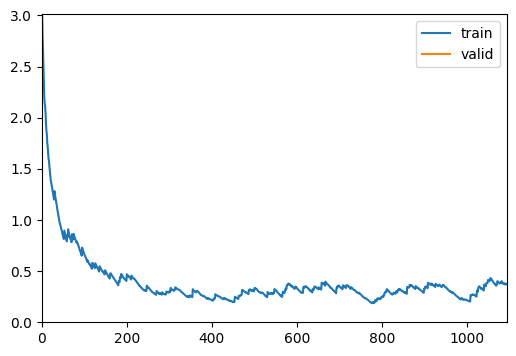

epoch,train_loss,valid_loss,accuracy,time
0,0.145035,0.468845,0.898500,01:53
1,0.196671,0.506340,0.913500,01:54
2,0.137514,0.442883,0.923200,01:56
3,0.079851,0.509466,0.920600,01:54
4,0.147625,0.507428,0.922200,01:54
5,0.108062,0.526488,0.913700,01:56
6,0.072806,0.497167,0.914800,01:55
7,0.067376,0.521282,0.928400,01:53
8,0.036550,0.566126,0.916700,01:56
9,0.046736,0.570119,0.930400,01:57


Better model found at epoch 0 with valid_loss value: 0.4688452184200287.


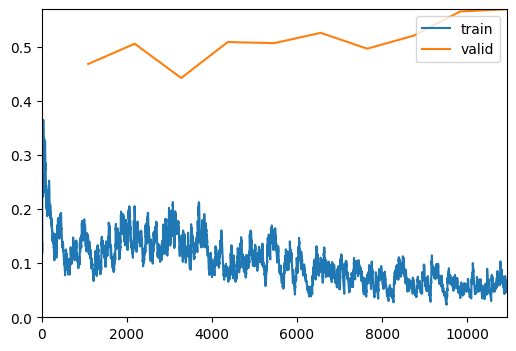

Better model found at epoch 2 with valid_loss value: 0.44288280606269836.


In [18]:
learnClass.fine_tune(10, 6e-2)

In [19]:
learnClass.predict('तर्क दे नाल अपना बचाव करो')

('hi',
 tensor(7),
 tensor([1.5138e-09, 5.2632e-09, 8.4715e-13, 1.6924e-08, 2.1432e-09, 9.2179e-10,
         1.1119e-09, 9.9998e-01, 2.9189e-07, 3.2759e-06, 2.4235e-10, 3.3911e-10,
         4.7003e-08, 1.2356e-09, 1.1142e-08, 8.3791e-08, 5.6807e-08, 3.0654e-06,
         6.5502e-09, 1.1017e-05]))

In [20]:
test_df['set']=True

train_valid_df = pd.concat([train_df,valid_df])
train_valid_df = train_valid_df.rename(columns={"text_lang": "text"})
dls_test = language_class.dataloaders(train_valid_df, bs=64)

In [21]:
learnClass.dls = dls_test
learnClass.validate()

Better model found at epoch 0 with valid_loss value: 0.9232000112533569.


(#2) [0.44288280606269836,0.9232000112533569]

## **HUGGING FACE**

In [22]:
!pip install huggingface_hub["fastai"] -Uq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.3/401.3 kB 6.6 MB/s eta 0:00:00


In [23]:
from huggingface_hub import notebook_login

notebook_login()

In [25]:
from huggingface_hub import push_to_hub_fastai

# repo_id = "YOUR_USERNAME/YOUR_LEARNER_NAME"
repo_id = "joberiai/lang_class"

push_to_hub_fastai(learner=learn, repo_id=repo_id)

model.pkl:   0%|          | 0.00/232M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/joberiai/lang_class/commit/c0cf02e0afa5c28680ccdc965758709dffa286b2', commit_message='Push FastAI model using huggingface_hub.', commit_description='', oid='c0cf02e0afa5c28680ccdc965758709dffa286b2', pr_url=None, pr_revision=None, pr_num=None)

Aquí acaba el entregable